In [1]:
#IPath = 'test/SoniaLaskar_Mask_test.jpg'
IPath = 'test/test_SRK_12.jpg'

In [2]:
idname = ''
masked = False
cclv = ''
ccohort = ''
offer = ''

In [3]:
#importing required libraries

import pandas as pd
import numpy as np 
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import pickle
import bz2
import _pickle as cPickle
import cv2
import matplotlib.pyplot as plt
import math
import cv2
import hashlib
import glob
import os
from scipy import fft
from mtcnn.mtcnn import MTCNN
import matplotlib.image as img 
from keras.models import load_model
%matplotlib inline

In [4]:
def detect_mask(IPath):
    #model=load_model("my_model.h5")
    model=load_model("Mask_Detector.h5")
    results={0:'without mask',1:'mask'}
    GR_dict={0:(255,0,0),1:(0,0,255)}
    rect_size = 4
   
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    im = cv2.imread(IPath)
    
    global imgg1
    imgg1 = img.imread(IPath) 
    #plt.imshow(im)
    #plt.show()

    im=cv2.flip(im,1,1) 

    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    faces = face_cascade.detectMultiScale(rerect_size)

    for f in faces:
        (x, y, w, h) = [v * rect_size for v in f] 

        print(x, y, w, h)

        face_img = im[y:y+h, x:x+w]


        #plt.imshow(face_img)
        #plt.show()

        rerect_sized=cv2.resize(face_img,(150,150))

        #plt.imshow(rerect_sized)
        #plt.show()

        normalized=rerect_sized/255.0

        #plt.imshow(normalized)
        #plt.show()

        reshaped=np.reshape(normalized,(1,150,150,3))

        reshaped = np.vstack([reshaped])

        result=model.predict(reshaped)

        print('Result Probabilities: ',result)

        label=np.argmax(result,axis=1)[0]

        print('Result label: ',label)
    

        print('Result:',results[label])
        
        if label == 1:
            global masked
            masked = True
      

        cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
        cv2.putText(im, results[label], (x, y-20),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        cv2.rectangle(imgg1,(x,y),(x+w,y+h),GR_dict[label],2)
        cv2.rectangle(imgg1,(x,y-40),(x+w,y),GR_dict[label],-1)
        cv2.putText(imgg1, results[label], (x, y-20),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        plt.imshow(im)
        plt.show()
        

Mask_Detection #  :
108 272 468 468
Result Probabilities:  [[0.22621018 0.7737899 ]]
Result label:  1
Result: mask


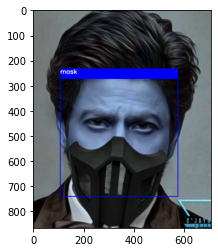

---------------------------------------------



In [5]:
#IPath = 'test/SoniaLaskar_Mask_test.jpg'
print('Mask_Detection #',' :')
i = IPath
detect_mask(i)
print('---------------------------------------------\n')

[[ 27  68 117 117]]
108 272 468 468
23
(234, 468)
(128, 64)


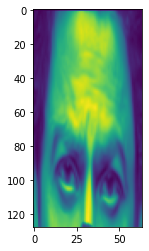

(128, 64)
(128, 64)
8215


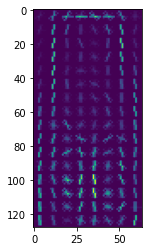

Identified: Male


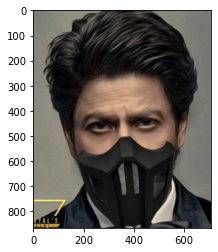

In [6]:
# reading the image 
#IPath = 'test/SoniaLaskar_Mask_test.jpg'
testImage = img.imread(IPath) 
  
# displaying the image 
plt.imshow(testImage)



MEAN_IMG = []
FSHIFT_IMG = []
HIST_IMG = []
DCT_IMG = []

x2,y2,w2,h2 = 0,0,0,0

GR_dict={0:(0,0,255),1:(0,255,0)}
rect_size = 4
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

originalImage = cv2.imread(IPath)#(fls) 
#plt.imshow(originalImage, cmap = 'gray')

grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)


H2 = grayImage.copy()
grayImage.resize(180,180)
X = grayImage.flatten()

img = grayImage.copy()

im=cv2.flip(H2,1,1) 



rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
faces = face_cascade.detectMultiScale(rerect_size)



#print(rerect_size)

print(faces)

for f in faces:
    (x, y, w, h) = [v * rect_size for v in f] 

    print(x,y,w,h)

    face_img = im[y:y+h, x:x+w]
    rerect_sized=cv2.resize(face_img,(150,150))
    normalized=rerect_sized/255.0

    label=0

    cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
    cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
    #cv2.putText(im, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)

    roi_face=face_img.copy()

    roi_face_half=roi_face[0:int(face_img.shape[0]/2),:]


    #folder_path = os.path.join(folder_path,file_name)

    image_content = roi_face_half.copy()


    

f = np.fft.fft2(roi_face_half)
fshift = np.fft.fftshift(f)

MEAN_IMG.append(roi_face_half.mean())

FSHIFT_IMG.append(fshift.mean())

HIST_IMG.append(np.histogram(roi_face_half)[0])

HI = pd.DataFrame(data = HIST_IMG)

gfg = fft.dct(roi_face_half)

DCT_IMG.append(gfg)

#16 Feature Vectors
FV_LIST = [np.mean(FSHIFT_IMG).real,
   np.mean(FSHIFT_IMG).imag,
   np.mean(MEAN_IMG),
   np.mean(HI).mean(),
   HI.iloc[:,0].mean(),
   HI.iloc[:,1].mean(),
   HI.iloc[:,2].mean(),
   HI.iloc[:,3].mean(),
   HI.iloc[:,4].mean(),
   HI.iloc[:,5].mean(),
   HI.iloc[:,6].mean(),
   HI.iloc[:,7].mean(),
   HI.iloc[:,8].mean(),
   HI.iloc[:,9].mean(),
   np.mean(DCT_IMG).real,
   np.mean(DCT_IMG).imag]

face_half_area = roi_face_half.shape[0]*roi_face_half.shape[1]
        
def shortest_distance(x1, y1, a, b, c):  
    return abs((a * x1 + b * y1 + c)) / (math.sqrt(a * a + b * b)) 
            
detector = MTCNN()

OI = originalImage.copy()
cv2.resize(OI,(180,180)).shape
# detect faces in the image
faces = detector.detect_faces(OI)#grayImage)
        
try:   
    
    left_eye_distance = shortest_distance(faces[0]['keypoints']['left_eye'][0],
                                                 faces[0]['keypoints']['left_eye'][1],
                                                 1,0,-1*(faces[0]['box'][0]))
            
    right_eye_distance = shortest_distance(faces[0]['keypoints']['right_eye'][0],
                                                 faces[0]['keypoints']['right_eye'][1],
                                                 1,0,-1*(faces[0]['box'][0]+faces[0]['box'][2]))
        
    
    p1_x = faces[0]['box'][0]
    p1_y = faces[0]['box'][1]

    p2_x = faces[0]['box'][0]+faces[0]['box'][3]
    p2_y = faces[0]['box'][1]

    #print(p1_x,p1_y,p2_x,p2_y)

    #forehead centre

    fhead_x = 0.5*(p1_x+p2_x)
    fhead_y = 0.5*(p1_y+p2_y)
    #print(fhead_x,fhead_y)

    #print(head_x,head_y)
    head_x = 0.5*(faces[0]['keypoints']['left_eye'][0]+faces[0]['keypoints']['right_eye'][0])
    head_y = 0.5*(faces[0]['keypoints']['left_eye'][1]+faces[0]['keypoints']['right_eye'][1])
    #print(head_x,head_y)

    fhead_measure = np.linalg.norm(np.array([fhead_x,fhead_y])-np.array([head_x,head_y]))
    #print(fhead_measure)



    FV_LIST[15] = np.linalg.norm(np.array(faces[0]['keypoints']['left_eye'])-np.array(faces[0]['keypoints']['right_eye']))
    FV_LIST.append(fhead_measure)   
    FV_LIST.append(left_eye_distance)
    FV_LIST.append(right_eye_distance)
    FV_LIST.append(np.std(OI[:,:,0]))
    FV_LIST.append(np.std(OI[:,:,1]))
    FV_LIST.append(np.std(OI[:,:,2]))
    
except:
    FV_LIST.append(0)
    FV_LIST.append(0)
    FV_LIST.append(0)
    FV_LIST.append(0)
    FV_LIST.append(0)
    FV_LIST.append(0)
    pass

FV_LIST.append(face_half_area)

#resizing image - HOG
print(len(FV_LIST))
print(roi_face_half.shape)
resized_img = resize(roi_face_half, (128,64)) 
print(resized_img.shape)
plt.imshow(resized_img) 
plt.show()
print(resized_img.shape)

#creating hog features 
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
            cells_per_block=(2, 2), visualize=True)
# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 
print(hog_image_rescaled.shape)

hog_image_rescaled_flat = hog_image_rescaled.flatten()

FV_LIST.extend(hog_image_rescaled_flat)

print(len(FV_LIST))
#print(FV_LIST)

plt.imshow(hog_image_rescaled) 
plt.show()

df = pd.DataFrame(data = [FV_LIST])

import pandas as pd
import numpy as np
import pickle
import bz2
import _pickle as cPickle
import cv2
import matplotlib.pyplot as plt

def decompress_pickle(file):
    data = bz2.BZ2File(file, 'rb')
    data = cPickle.load(data)
    return data

data = decompress_pickle('model_MF.pbz2') 

load_clf = data


prediction = load_clf.predict(df)
prediction_proba = load_clf.predict_proba(df)

citi = ['Male','Female']

print('Identified:',citi[int(prediction)])

gender = citi[int(prediction)]

gender_code = int(prediction)

import matplotlib.pyplot as plt 
import matplotlib.image as img 
  
# reading the image 
testImage = img.imread(IPath) 
  
# displaying the image 
plt.imshow(testImage)

plt.show()

[[ 27  68 117 117]]
108 272 468 468
23
(234, 468)
(128, 64)


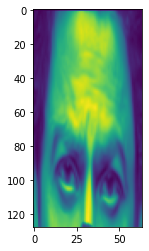

(128, 64)
(128, 64)
8216


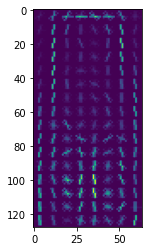

In [7]:
#predict person/ customer

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import hashlib
import glob
import os
from scipy import fft
from mtcnn.mtcnn import MTCNN

#IPath = r"5cd9a2c7db.jpg"

import matplotlib.pyplot as plt 
import matplotlib.image as img 
  
# reading the image 
testImage = img.imread(IPath) 
  
# displaying the image 
plt.imshow(testImage)



MEAN_IMG = []
FSHIFT_IMG = []
HIST_IMG = []
DCT_IMG = []

x2,y2,w2,h2 = 0,0,0,0

GR_dict={0:(0,0,255),1:(0,255,0)}
rect_size = 4
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

originalImage = cv2.imread(IPath)#(fls) 
#plt.imshow(originalImage, cmap = 'gray')




#from skimage import io

#img = io.imread(file_path)



grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)


H2 = grayImage.copy()
grayImage.resize(180,180)
X = grayImage.flatten()

img = grayImage.copy()

im=cv2.flip(H2,1,1) 



rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
faces = face_cascade.detectMultiScale(rerect_size)



#print(rerect_size)

print(faces)

for f in faces:
    (x, y, w, h) = [v * rect_size for v in f] 

    print(x,y,w,h)

    face_img = im[y:y+h, x:x+w]
    rerect_sized=cv2.resize(face_img,(150,150))
    normalized=rerect_sized/255.0

    label=0

    cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
    cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
    #cv2.putText(im, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)

    roi_face=face_img.copy()

    roi_face_half=roi_face[0:int(face_img.shape[0]/2),:]


    #folder_path = os.path.join(folder_path,file_name)

    image_content = roi_face_half.copy()


    

f = np.fft.fft2(roi_face_half)
fshift = np.fft.fftshift(f)

MEAN_IMG.append(roi_face_half.mean())

FSHIFT_IMG.append(fshift.mean())

HIST_IMG.append(np.histogram(roi_face_half)[0])

HI = pd.DataFrame(data = HIST_IMG)

gfg = fft.dct(roi_face_half)

DCT_IMG.append(gfg)

#16 Feature Vectors
FV_LIST = [np.mean(FSHIFT_IMG).real,
   np.mean(FSHIFT_IMG).imag,
   np.mean(MEAN_IMG),
   np.mean(HI).mean(),
   HI.iloc[:,0].mean(),
   HI.iloc[:,1].mean(),
   HI.iloc[:,2].mean(),
   HI.iloc[:,3].mean(),
   HI.iloc[:,4].mean(),
   HI.iloc[:,5].mean(),
   HI.iloc[:,6].mean(),
   HI.iloc[:,7].mean(),
   HI.iloc[:,8].mean(),
   HI.iloc[:,9].mean(),
   np.mean(DCT_IMG).real,
   np.mean(DCT_IMG).imag]

face_half_area = roi_face_half.shape[0]*roi_face_half.shape[1]
        
def shortest_distance(x1, y1, a, b, c):  
    return abs((a * x1 + b * y1 + c)) / (math.sqrt(a * a + b * b)) 
            
detector = MTCNN()

OI = originalImage.copy()
cv2.resize(OI,(180,180)).shape
# detect faces in the image
faces = detector.detect_faces(OI)#grayImage)
        
try:   
    
    left_eye_distance = shortest_distance(faces[0]['keypoints']['left_eye'][0],
                                                 faces[0]['keypoints']['left_eye'][1],
                                                 1,0,-1*(faces[0]['box'][0]))
            
    right_eye_distance = shortest_distance(faces[0]['keypoints']['right_eye'][0],
                                                 faces[0]['keypoints']['right_eye'][1],
                                                 1,0,-1*(faces[0]['box'][0]+faces[0]['box'][2]))
        
    
    p1_x = faces[0]['box'][0]
    p1_y = faces[0]['box'][1]

    p2_x = faces[0]['box'][0]+faces[0]['box'][3]
    p2_y = faces[0]['box'][1]

    #print(p1_x,p1_y,p2_x,p2_y)

    #forehead centre

    fhead_x = 0.5*(p1_x+p2_x)
    fhead_y = 0.5*(p1_y+p2_y)
    #print(fhead_x,fhead_y)

    #print(head_x,head_y)
    head_x = 0.5*(faces[0]['keypoints']['left_eye'][0]+faces[0]['keypoints']['right_eye'][0])
    head_y = 0.5*(faces[0]['keypoints']['left_eye'][1]+faces[0]['keypoints']['right_eye'][1])
    #print(head_x,head_y)

    fhead_measure = np.linalg.norm(np.array([fhead_x,fhead_y])-np.array([head_x,head_y]))
    #print(fhead_measure)



    FV_LIST[15] = np.linalg.norm(np.array(faces[0]['keypoints']['left_eye'])-np.array(faces[0]['keypoints']['right_eye']))
    FV_LIST.append(fhead_measure)   
    FV_LIST.append(left_eye_distance)
    FV_LIST.append(right_eye_distance)
    FV_LIST.append(np.std(OI[:,:,0]))
    FV_LIST.append(np.std(OI[:,:,1]))
    FV_LIST.append(np.std(OI[:,:,2]))
    
except:
    FV_LIST.append(0)
    FV_LIST.append(0)
    FV_LIST.append(0)
    FV_LIST.append(0)
    FV_LIST.append(0)
    FV_LIST.append(0)
    pass

FV_LIST.append(face_half_area)

#resizing image - HOG
print(len(FV_LIST))
print(roi_face_half.shape)
resized_img = resize(roi_face_half, (128,64)) 
print(resized_img.shape)
plt.imshow(resized_img) 
plt.show()
print(resized_img.shape)

#creating hog features 
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
            cells_per_block=(2, 2), visualize=True)
# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 
print(hog_image_rescaled.shape)

hog_image_rescaled_flat = hog_image_rescaled.flatten()

FV_LIST.extend(hog_image_rescaled_flat)

FV_LIST.append(gender_code)

print(len(FV_LIST))
#print(FV_LIST)

plt.imshow(hog_image_rescaled) 
plt.show()

df = pd.DataFrame(data = [FV_LIST])

In [8]:
mods_faces = []
mods_faces_pct =[]

Identified: Shah Rukh Khan


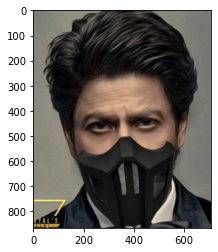

Surety Percentage: 27.0 %


In [9]:
#rfc_c_16_stacked_5_xg_stacked_FINAL

cities = ['Shah Rukh Khan','Sonia Laskar','Preity Zinta','Bobby Deol','Priyanka Chopra','Angelina Jolie','Anne Hathaway','Nicolas Cage','Amitabh Bacchan','Brad Pitt','Abhishek Bacchan','Ananya Pandey','Saif Ali Khan','Kareena Kapoor','Malaika Arora']

#Stacking Run

import pandas as pd
import numpy as np
import pickle
import bz2
import _pickle as cPickle
import cv2
import matplotlib.pyplot as plt

def decompress_pickle(file):
    data = bz2.BZ2File(file, 'rb')
    data = cPickle.load(data)
    return data

#choose a different model here
#data = decompress_pickle('rfc_c_16_stacked_5_xg_stacked_FINAL.pbz2') 
data = decompress_pickle('rfc_c_16_2.pbz2') 




load_clf = data

prediction = load_clf.predict(df)
prediction_proba_3 = load_clf.predict_proba(df)

print('Identified:',cities[int(prediction)])

import matplotlib.pyplot as plt 
import matplotlib.image as img 
  
# reading the image 
testImage = img.imread(IPath) 
  
# displaying the image 
plt.imshow(testImage)

plt.show()


r_prob_2 = prediction_proba_3[0][prediction[0]]
print('Surety Percentage:',round(r_prob_2*100,2),'%')
#print(prediction[0])
#print(prediction_proba_3)

list_indx_3 = []
for i in range(len(prediction_proba_3[0])):
    if prediction_proba_3[0][i]>0:
        list_indx_3.append(i)
        
#print('\nProbabilties: ')
#for i in list_indx_3:
#    print(cities[i],prediction_proba_3[0][i])

mods_faces.append(cities[int(prediction)])
mods_faces_pct.append(round(r_prob_2*100,2))

Identified: Shah Rukh Khan


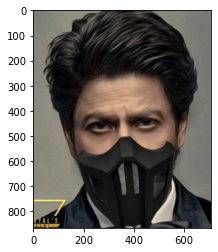

Surety Percentage: 84.95 %


In [10]:
#rfc_c_16_stacked_5_xg_stacked_FINAL

cities = ['Shah Rukh Khan','Sonia Laskar','Preity Zinta','Bobby Deol','Priyanka Chopra','Angelina Jolie','Anne Hathaway','Nicolas Cage','Amitabh Bacchan','Brad Pitt','Abhishek Bacchan','Ananya Pandey','Saif Ali Khan','Kareena Kapoor','Malaika Arora']

#Stacking Run

import pandas as pd
import numpy as np
import pickle
import bz2
import _pickle as cPickle
import cv2
import matplotlib.pyplot as plt

def decompress_pickle(file):
    data = bz2.BZ2File(file, 'rb')
    data = cPickle.load(data)
    return data

#choose a different model here
#data = decompress_pickle('rfc_c_16_stacked_5_xg_stacked_FINAL.pbz2') 
data = decompress_pickle('rfc_c_16_3.pbz2') 




load_clf = data

prediction = load_clf.predict(df)
prediction_proba_3 = load_clf.predict_proba(df)

print('Identified:',cities[int(prediction)])

import matplotlib.pyplot as plt 
import matplotlib.image as img 
  
# reading the image 
testImage = img.imread(IPath) 
  
# displaying the image 
plt.imshow(testImage)

plt.show()


r_prob_2 = prediction_proba_3[0][prediction[0]]
print('Surety Percentage:',round(r_prob_2*100,2),'%')
#print(prediction[0])
#print(prediction_proba_3)

list_indx_3 = []
for i in range(len(prediction_proba_3[0])):
    if prediction_proba_3[0][i]>0:
        list_indx_3.append(i)
        
#print('\nProbabilties: ')
#for i in list_indx_3:
#    print(cities[i],prediction_proba_3[0][i])

mods_faces.append(cities[int(prediction)])
mods_faces_pct.append(round(r_prob_2*100,2))

Identified: Shah Rukh Khan


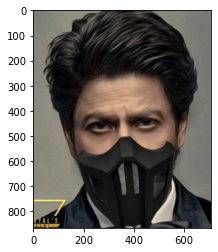

Surety Percentage: 99.63 %


In [11]:
#rfc_c_16_stacked_5_xg_stacked_FINAL

cities = ['Shah Rukh Khan','Sonia Laskar','Preity Zinta','Bobby Deol','Priyanka Chopra','Angelina Jolie','Anne Hathaway','Nicolas Cage','Amitabh Bacchan','Brad Pitt','Abhishek Bacchan','Ananya Pandey','Saif Ali Khan','Kareena Kapoor','Malaika Arora']

#Stacking Run

import pandas as pd
import numpy as np
import pickle
import bz2
import _pickle as cPickle
import cv2
import matplotlib.pyplot as plt

def decompress_pickle(file):
    data = bz2.BZ2File(file, 'rb')
    data = cPickle.load(data)
    return data

#choose a different model here
data = decompress_pickle('rfc_c_16_stacked_5_xg_stacked_FINAL.pbz2') 
#data = decompress_pickle('rfc_c_16_3.pbz2') 




load_clf = data

prediction = load_clf.predict(df)
prediction_proba_3 = load_clf.predict_proba(df)

print('Identified:',cities[int(prediction)])

import matplotlib.pyplot as plt 
import matplotlib.image as img 
  
# reading the image 
testImage = img.imread(IPath) 
  
# displaying the image 
plt.imshow(testImage)

plt.show()


r_prob_2 = prediction_proba_3[0][prediction[0]]
print('Surety Percentage:',round(r_prob_2*100,2),'%')
#print(prediction[0])
#print(prediction_proba_3)

list_indx_3 = []
for i in range(len(prediction_proba_3[0])):
    if prediction_proba_3[0][i]>0:
        list_indx_3.append(i)
        
#print('\nProbabilties: ')
#for i in list_indx_3:
#    print(cities[i],prediction_proba_3[0][i])

mods_faces.append(cities[int(prediction)])
mods_faces_pct.append(round(r_prob_2*100,2))

In [12]:
print(mods_faces)
print(mods_faces_pct)

['Shah Rukh Khan', 'Shah Rukh Khan', 'Shah Rukh Khan']
[27.0, 84.95, 99.63]


In [13]:
tot_f = 0
if (mods_faces[0] == mods_faces[1]) and (mods_faces[0]!=mods_faces[2] ):
    tot_f = (1.5)*mods_faces_pct[0] + mods_faces_pct[1]
    print(tot_f,mods_faces_pct[2])

if tot_f > mods_faces_pct[2]:
    #idname = cities[int(prediction)]
    idname = mods_faces[0]
else:
    idname = mods_faces[2]

Name: Shah Rukh Khan
Surety Percentage: 99.63 %
Mask Detected: True


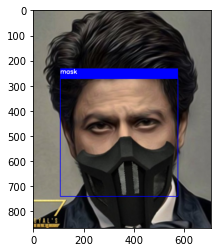

In [14]:
print('Name:' , idname)#cities[int(prediction)])
print('Surety Percentage:',round(r_prob_2*100,2),'%')
print('Mask Detected:',masked)

plt.imshow(imgg1)
plt.show()

In [15]:
#idname = cities[int(prediction)]

In [16]:
names = ['Sonia Laskar','Shah Rukh Khan','Preity Zinta','Bobby Deol','Priyanka Chopra','Angelina Jolie','Anne Hathaway','Nicolas Cage','Amitabh Bacchan','Brad Pitt','Abhishek Bacchan','Ananya Pandey','Saif Ali Khan','Kareena Kapoor','Malaika Arora']

In [17]:
data = pd.DataFrame(data = {'Name':names})

In [18]:
X = pd.read_csv('Transactions',index_col = 'cust')

In [19]:
#Dropping above .11# rows with 0 sales value
X = X[X['sales']>0]
X.shape

(69579, 2)

In [20]:
counts = X.reset_index().groupby('cust').count()

In [21]:
X['counts'] = counts['sales']

In [22]:
#only one time transactions
X_1 = X[X['counts'] == 1]
X_1_cust_id = np.unique(X_1.index)

In [23]:
#only two time transactions
X_2 = X[X['counts'] == 2]

p2 = round(X_2.shape[0]*100/X.shape[0],2)

X_2_cust_id = np.unique(X_2.index)

In [24]:
#only three time transactions
X_3 = X[X['counts'] == 3]

p3 = round(X_3.shape[0]*100/X.shape[0],2)

X_3_cust_id = np.unique(X_3.index)

In [25]:
#more than four times transactions
X_4 = X[(X['counts'] >= 4)]

p4 = round(X_4.shape[0]*100/X.shape[0],2)

X_4_cust_id = np.unique(X_4.index.values)

In [26]:
clv_all = pd.read_csv('clv_all.csv')

clv_all.set_index('cust',inplace = True)

#clv_all

In [27]:
import random

#test case
#select randomly from transaction with Ti, with i<=n, where n = 1,2,3
X_1_2_3_cust_id = []
for i in [X_1_cust_id,X_2_cust_id,X_3_cust_id]:
    X_1_2_3_cust_id.extend(i) 
chft = random.choice(X_1_2_3_cust_id)
print(chft,'\n')

print(clv_all.loc[chft])

1536 

date      1997-02-05
sales           5.78
counts             1
clv                0
Name: 1536, dtype: object


In [28]:
ind = data[data['Name']=='Sonia Laskar'].index.values[0]

data.loc[ind,'cust'] = chft
data.loc[ind,'date'] = clv_all.loc[chft]['date']
data.loc[ind,'sales'] = clv_all.loc[chft]['sales']
data.loc[ind,'counts'] = clv_all.loc[chft]['counts']
data.loc[ind,'clv'] = clv_all.loc[chft]['clv']

In [29]:
data

,Name,cust,date,sales,counts,clv
0,Sonia Laskar,1536.0,1997-02-05,5.78,1.0,0.0
1,Shah Rukh Khan,NaN,NaN,NaN,NaN,NaN
2,Preity Zinta,NaN,NaN,NaN,NaN,NaN
3,Bobby Deol,NaN,NaN,NaN,NaN,NaN
4,Priyanka Chopra,NaN,NaN,NaN,NaN,NaN
5,Angelina Jolie,NaN,NaN,NaN,NaN,NaN
6,Anne Hathaway,NaN,NaN,NaN,NaN,NaN
7,Nicolas Cage,NaN,NaN,NaN,NaN,NaN
8,Amitabh Bacchan,NaN,NaN,NaN,NaN,NaN
9,Brad Pitt,NaN,NaN,NaN,NaN,NaN


In [30]:
#test case
#select randomly from transaction with Ti, with i>4


XXX = clv_all[clv_all.counts.gt(3)]

#XXX.set_index('cust',inplace = True)

chft_rest = random.choices(XXX.index.values, k = 14)
print(chft_rest,'\n')

for i in chft_rest:
    print(clv_all.loc[i])

[9432, 17264, 2459, 12746, 6168, 10290, 7585, 4615, 17011, 2957, 7698, 16064, 12792, 15344] 

date      1997-07-31
sales           6.79
counts             5
clv          56.5726
Name: 9432, dtype: object
date      1998-06-17
sales          12.58
counts             6
clv          21.9918
Name: 17264, dtype: object
date      1997-07-26
sales           36.9
counts             5
clv          134.513
Name: 2459, dtype: object
date      1998-05-29
sales          43.16
counts             4
clv           16.149
Name: 12746, dtype: object
date      1997-12-01
sales          21.49
counts             4
clv          112.211
Name: 6168, dtype: object
date      1998-06-25
sales          18.98
counts             7
clv          82.9545
Name: 10290, dtype: object
date      1997-12-29
sales          25.48
counts             4
clv          114.107
Name: 7585, dtype: object
date      1998-04-19
sales          11.88
counts             7
clv            100.3
Name: 4615, dtype: object
date      1998-06-19
sa

In [31]:
j = 0
for i in names[1:]:
    ct = chft_rest[j]
    ind = data[data['Name']==i].index.values[0]

    data.loc[ind,'cust'] = ct
    data.loc[ind,'date'] = clv_all.loc[ct]['date']
    data.loc[ind,'sales'] = clv_all.loc[ct]['sales']
    data.loc[ind,'counts'] = clv_all.loc[ct]['counts']
    data.loc[ind,'clv'] = clv_all.loc[ct]['clv']
    j = j + 1  

In [32]:
data.rename(columns = {'sales':'last_sales'},inplace = True)

In [33]:
data[data['Name']==idname]

,Name,cust,date,last_sales,counts,clv
1,Shah Rukh Khan,9432.0,1997-07-31,6.79,5.0,56.572644


In [34]:
def func_email(s):
    s = s.split()
    s1 = []
    for i in s:
        s1.append(i.lower())
    
    print("".join(s1)+'@'+'hotmail.com')
    return "".join(s1)+'@'+'hotmail.com'
      

In [35]:
data['email'] = data['Name'].apply(func_email)

sonialaskar@hotmail.com
shahrukhkhan@hotmail.com
preityzinta@hotmail.com
bobbydeol@hotmail.com
priyankachopra@hotmail.com
angelinajolie@hotmail.com
annehathaway@hotmail.com
nicolascage@hotmail.com
amitabhbacchan@hotmail.com
bradpitt@hotmail.com
abhishekbacchan@hotmail.com
ananyapandey@hotmail.com
saifalikhan@hotmail.com
kareenakapoor@hotmail.com
malaikaarora@hotmail.com


In [36]:
data['phone'] = 8355937492

In [37]:
#display previous transactions of any customer

def find_cust_prev_transactions(idname):
        print('--------------------'*4)
        print('CUSTOMER DETAILS: ')
        print('--------------------'*4)
        print('Customer Name: ',idname)
        print('Customer ID: ',int(data[data['Name']==idname]['cust']))
        print('Phone :', data[data['Name']==idname]['phone'].values[0] )
        print('Email :', data[data['Name']==idname]['email'].values[0] )
        
        print('Number of non zero transactions: ',np.unique(X[X.index ==  int(data[data['Name']==idname]['cust']) ]['counts'].values)[0] )
        
        print('--------------------'*4)
        print( X[X.index ==  int(data[data['Name']==idname]['cust']) ][['date','sales']] )
        print('--------------------'*4)
        print('\nCLV:' , round(clv_all.loc[int(data[data['Name']==idname]['cust']) ]['clv'] , 2))
        print('--------------------'*4)

In [38]:
find_cust_prev_transactions(idname)

--------------------------------------------------------------------------------
CUSTOMER DETAILS: 
--------------------------------------------------------------------------------
Customer Name:  Shah Rukh Khan
Customer ID:  9432
Phone : 8355937492
Email : shahrukhkhan@hotmail.com
Number of non zero transactions:  5
--------------------------------------------------------------------------------
            date  sales
cust                   
9432  1997-02-11  18.76
9432  1997-02-17  13.97
9432  1997-04-27  15.36
9432  1997-04-28  11.77
9432  1997-07-31   6.79
--------------------------------------------------------------------------------

CLV: 56.57
--------------------------------------------------------------------------------


In [39]:
clv_all_RFMT =  pd.read_csv('clv_all_RFMT.csv')
clv_all_RFMT.drop(columns = ['Unnamed: 0'],inplace = True)

In [40]:
#clv_all_RFMT

In [41]:
#clv_all_RFMT[clv_all_RFMT['cust']==9336]

In [42]:
cts = X['date'].groupby('cust').count()

In [43]:
#data[data['Name'] == idname]

In [44]:
#transaction count trs_cnt
X = X.reset_index()

In [45]:
print(idname)

trs_cnt = cts[int(data[data['Name'] == idname]['cust'])]

print('Number of previous transactions: ',trs_cnt)

if trs_cnt==1 :
    f1 = X.groupby('cust').agg({'sales':'first'})

    f = f1.loc[int(data[data['Name'] == idname]['cust'])]
    print(f[0])

    Xy = clv_all_RFMT[clv_all_RFMT['cust'] == int(data[data['Name'] == idname]['cust'])][['recency','frequency','T','monetary_value']]

    #print(clv_all_RFMT[clv_all_RFMT['cust'] == int(data[data['Name'] == idname]['cust'])][['recency','frequency','T','monetary_value']])

    print(Xy)

    Xy['First_TValue'] = f[0]

    md = pickle.load(open('hclv_1.pkl','rb'))

    cclv = md.predict(Xy)[0] 

    print(md.predict(Xy)[0])
    
elif trs_cnt==2 :

    f1 = X.groupby('cust').agg({'sales':'first'})

    f2 = X.groupby('cust').nth(1)

    f = f1.loc[int(data[data['Name'] == idname]['cust'])]
    #print(f[0])

    ff = f2.loc[int(data[data['Name'] == idname]['cust'][0])]
    print(f[0],ff['sales'])

    Xy = clv_all_RFMT[clv_all_RFMT['cust'] == int(data[data['Name'] == idname]['cust'])][['recency','frequency','T','monetary_value']]

    #print(clv_all_RFMT[clv_all_RFMT['cust'] == int(data[data['Name'] == idname]['cust'])][['recency','frequency','T','monetary_value']])

    print(Xy)

    Xy['First_TValue'] = f[0]
    Xy['Second_TValue'] = ff['sales']

    md = pickle.load(open('hclv_2.pkl','rb'))

    cclv = md.predict(Xy)[0] 
    
    print(md.predict(Xy)[0])

elif trs_cnt==3 :

    f1 = X.groupby('cust').agg({'sales':'first'})

    f2 = X.groupby('cust').nth(1)

    f3 = X.groupby('cust').nth(2)



    f = f1.loc[int(data[data['Name'] == idname]['cust'])]
    #print(f[0])

    ff = f2.loc[int(data[data['Name'] == idname]['cust'])]

    fff = f3.loc[int(data[data['Name'] == idname]['cust'])]

    print(f[0],ff['sales'],fff['sales'])

    Xy = clv_all_RFMT[clv_all_RFMT['cust'] == int(data[data['Name'] == idname]['cust'])][['recency','frequency','T','monetary_value']]

    #print(clv_all_RFMT[clv_all_RFMT['cust'] == int(data[data['Name'] == idname]['cust'])][['recency','frequency','T','monetary_value']])

    #print(Xy)
    
    md = pickle.load(open('hclv_3.pkl','rb'))
    
    cclv = md.predict(Xy)[0] 
    
elif trs_cnt>=4 :
    #print(trs_cnt)
    cclv = round(data[data['Name']==idname]['clv'].values[0],2)
    print('CLV: ',round(data[data['Name']==idname]['clv'].values[0],2))

Shah Rukh Khan
Number of previous transactions:  5
CLV:  56.57


In [46]:
#clv_all_RFMT[clv_all_RFMT['cust'] == int(data[data['Name'] == idname]['cust'])][['cust','clv']]

In [47]:
mod_db_cl = pickle.load(open('mod_db_cl.pkl','rb'))

model = mod_db_cl
#mod_db_cl.predict() - no such inbuilt function - so created a user defined function here

X_hclv = cclv #sl_hclv #hclv used to predict cluster

diff = model.components_ - X_hclv  # NumPy broadcasting

dist = np.linalg.norm(diff, axis=1)  # Euclidean distance

shortest_dist_idx = np.argmin(dist)

y_new = model.labels_[model.core_sample_indices_[shortest_dist_idx]]

print(y_new)

ccohort = y_new

0


In [48]:
#So decide recommended offer 
offer = 'C'+str(y_new)

print(offer)

C0


In [49]:
#Send through email/msg

em = data[data['Name']==idname]['email']
ph = data[data['Name']==idname]['phone']
print('Email:',em.values[0])
print('Phone:',ph.values[0])

Email: shahrukhkhan@hotmail.com
Phone: 8355937492


In [50]:
#Start server using this

#First activate the smtp server

#python -m smtpd -c DebuggingServer -n localhost:1025

import smtplib
from email.mime.text import MIMEText

gmailaddress = 'sonnialaskar@gmail.com'#input("what is your gmail address? \n ")
gmailpassword = 'Sonia1Laskar'#input("what is the password for that email address? \n  ")
mailto = str(em.values[0])#'sonialaskar@hotmail.com'#input("what email address do you want to send your message to? \n ")

str_msg_str = 'Hi '+ idname + '. Welcome to our store. Avail the special offers ' + offer+' for you at our store.'

msg = MIMEText(str_msg_str)

msg['Subject'] = 'CD Store Promotional Offer mail'
msg['From'] = 'Sonia Laskars CD Store'#'sonnialaskar@gmail.com'
msg['To'] = str(em.values[0])#'sonialaskar@hotmail.com'

mailServer = smtplib.SMTP('smtp.gmail.com' , 587)
mailServer.starttls()
mailServer.login(gmailaddress , gmailpassword)
mailServer.sendmail(gmailaddress, mailto , msg.as_string())
print(" \n Sent!")
mailServer.quit()

 
 Sent!


(221, b'2.0.0 closing connection i7sm14873300pjx.13 - gsmtp')

import requests url = "https://www.fast2sms.com/dev/bulk" payload = "sender_id=FSTSMS&message=test&language=english&route=p&numbers="+ph headers = { 'authorization': "xuYRwBcjEH5yfKGor2UNFPCJTQL39s0Sp1IMOz6nkblmdZt4DvIOERw5ie168GUPsbgQJ4KX0T2FDZz9", 'Content-Type': "application/x-www-form-urlencoded", 'Cache-Control': "no-cache", } response = requests.request("POST", url, data=payload, headers=headers) print(response.text)

In [51]:
#display previous transactions of any customer

def find_cust_prev_transactions_last_clv(idname):
        print('--------------------'*4)
        print('CUSTOMER DETAILS: ')
        print('--------------------'*4)
        
        print('Customer Name: ',idname)
        
        #print('Name:' , cities[int(prediction)])
        print('Surety Percentage:',round(r_prob_2*100,2),'%')
        print('Mask Detected:',masked)

        plt.imshow(imgg1)
        plt.axis('off')
        plt.show()
        
        
        
        print('Customer ID: ',int(data[data['Name']==idname]['cust']))
        print('Phone :', data[data['Name']==idname]['phone'].values[0] )
        print('Email :', data[data['Name']==idname]['email'].values[0] )
        
        trn_counts = np.unique(X[X.cust ==  int(data[data['Name']==idname]['cust']) ]['counts'].values)[0]
        print('Number of non zero transactions: ',trn_counts )
        
        print('--------------------'*4)
        print( X[X.cust ==  int(data[data['Name']==idname]['cust']) ][['date','sales']] )
        print('--------------------'*4)
        
        if trn_counts<4 :
            print('\nPotential Future CLV:' , round(cclv,2))#round(clv_all.loc[int(data[data['Name']==idname]['cust']) ]['clv'] , 2))
            print('Potential Cohort: ',ccohort)
        else:
            print('\nCLV:' , round(cclv,2))#round(clv_all.loc[int(data[data['Name']==idname]['cust']) ]['clv'] , 2))
        
            print('Cohort: ',ccohort)
            
        print('Offer given: ',offer)
        print('--------------------'*4)
        

--------------------------------------------------------------------------------
CUSTOMER DETAILS: 
--------------------------------------------------------------------------------
Customer Name:  Shah Rukh Khan
Surety Percentage: 99.63 %
Mask Detected: True


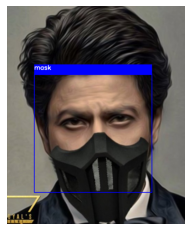

Customer ID:  9432
Phone : 8355937492
Email : shahrukhkhan@hotmail.com
Number of non zero transactions:  5
--------------------------------------------------------------------------------
             date  sales
29312  1997-02-11  18.76
29313  1997-02-17  13.97
29314  1997-04-27  15.36
29315  1997-04-28  11.77
29316  1997-07-31   6.79
--------------------------------------------------------------------------------

CLV: 56.57
Cohort:  0
Offer given:  C0
--------------------------------------------------------------------------------


In [52]:
#FINAL OUTPUT

find_cust_prev_transactions_last_clv(idname)

print('Is the prediction right ?')
If yes, exit.

If no, display options generated by above algorithm:
print(mods_faces)
print(mods_faces_pct)

Take feedback

In [53]:
print(mods_faces)
print(mods_faces_pct)

['Shah Rukh Khan', 'Shah Rukh Khan', 'Shah Rukh Khan']
[27.0, 84.95, 99.63]
